## 1. Introduction <a id='1'></a>

The main task for this notebook is to perform the data exploratory analysis on all three datasets. The datasets will be merged into one datasets for further feature engineering and machine learning modeling.

## 2. Data Exploratory <a id='2'></a>

### 2.1 Imports <a id='2.1'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
%matplotlib inline

C:\Users\AKHILSREEKAR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2.2 Building Data<a id='2.2'></a>

In [2]:
path = 'data/building/'
file_name = 'building_cleaned.csv'
full_path = path + file_name
building_data = pd.read_csv(full_path)

In [3]:
building_data.head()

,Unnamed: 0,site_id,building_id_n,site_id_n,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,eui,site_eui,source_eui
0,916,Ottawa,789.0,7.0,Education,College Classroom,6000.0,US/Eastern,NaN,NaN,NaN
1,917,Ottawa,790.0,7.0,Education,College Classroom,8000.0,US/Eastern,NaN,NaN,NaN
2,918,Ottawa,791.0,7.0,Education,College Classroom,14000.0,US/Eastern,NaN,NaN,NaN
3,919,Ottawa,792.0,7.0,Education,College Classroom,31000.0,US/Eastern,NaN,NaN,NaN
4,920,Ottawa,793.0,7.0,Education,College Classroom,14000.0,US/Eastern,NaN,NaN,NaN


Due to large amount of data, Ottawa is chosen to be the target for our analysis and modeling.

In [4]:
building_data.head().T

,0,1,2,3,4
Unnamed: 0,916,917,918,919,920
site_id,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa
building_id_n,789.0,790.0,791.0,792.0,793.0
site_id_n,7.0,7.0,7.0,7.0,7.0
primaryspaceusage,Education,Education,Education,Education,Education
sub_primaryspaceusage,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom
sqm,6000.0,8000.0,14000.0,31000.0,14000.0
timezone,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern
eui,NaN,NaN,NaN,NaN,NaN
site_eui,NaN,NaN,NaN,NaN,NaN


In [5]:
building_data = building_data[building_data['site_id'] == "Ottawa"]
building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20 non-null     int64  
 1   site_id                20 non-null     object 
 2   building_id_n          20 non-null     float64
 3   site_id_n              20 non-null     float64
 4   primaryspaceusage      20 non-null     object 
 5   sub_primaryspaceusage  20 non-null     object 
 6   sqm                    20 non-null     float64
 7   timezone               20 non-null     object 
 8   eui                    0 non-null      float64
 9   site_eui               0 non-null      float64
 10  source_eui             0 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.9+ KB


In [6]:
'''columns to be removed as they either not providing enough information
   or provide redundant information.
'''
rm_columns = ['Unnamed: 0', 'eui', 'timezone', 'site_eui', 'source_eui']
building_data.drop(columns=rm_columns, axis= 1, inplace=True)
building_data.head()

,site_id,building_id_n,site_id_n,primaryspaceusage,sub_primaryspaceusage,sqm
0,Ottawa,789.0,7.0,Education,College Classroom,6000.0
1,Ottawa,790.0,7.0,Education,College Classroom,8000.0
2,Ottawa,791.0,7.0,Education,College Classroom,14000.0
3,Ottawa,792.0,7.0,Education,College Classroom,31000.0
4,Ottawa,793.0,7.0,Education,College Classroom,14000.0


In [7]:
building_data[['sub_primaryspaceusage']].value_counts()

sub_primaryspaceusage
College Classroom        15
Academic                  5
dtype: int64

In [8]:
building_data[['primaryspaceusage']].value_counts()

primaryspaceusage
Education            20
dtype: int64

In [9]:
# update dataframe name to make data easy to access.
building_data.rename(columns={'site_id':'location',
                              'building_id_n':'id',
                              'site_id_n':'loc_id',
                              'primaryspaceusage':'priUsage',
                              'sub_primaryspaceusage':'subUsage'}, inplace=True)

<AxesSubplot:ylabel='sqm'>

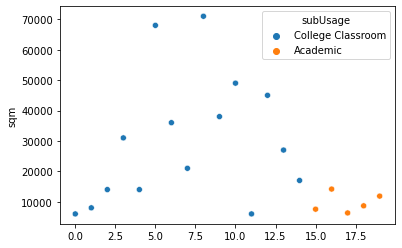

In [10]:
sns.scatterplot(data=building_data, x = [i for i in range(20)], y='sqm', hue='subUsage')

As all buildings are educational buildings and they are all from Ottawa, **location** and **priUsage** columns will be dropped.

In [11]:
rm_columns = ['location', 'priUsage']
building_data.drop(columns=rm_columns, axis= 1, inplace=True)
building_data.head()

,id,loc_id,subUsage,sqm
0,789.0,7.0,College Classroom,6000.0
1,790.0,7.0,College Classroom,8000.0
2,791.0,7.0,College Classroom,14000.0
3,792.0,7.0,College Classroom,31000.0
4,793.0,7.0,College Classroom,14000.0


In [12]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20 non-null     float64
 1   loc_id    20 non-null     float64
 2   subUsage  20 non-null     object 
 3   sqm       20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 800.0+ bytes


<AxesSubplot:xlabel='subUsage', ylabel='sqm'>

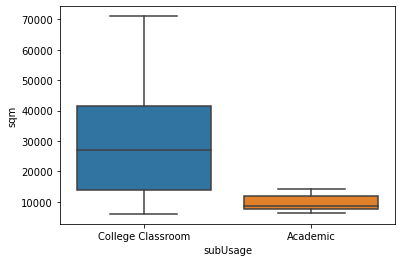

In [13]:
sns.boxplot(data=building_data, x='subUsage', y='sqm', orient='v')

In [14]:
building_data[building_data['subUsage'] == 'College Classroom'].describe()

,id,loc_id,sqm
count,15.000000,15.0,15.000000
mean,796.000000,7.0,30066.620000
std,4.472136,0.0,21076.246323
min,789.000000,7.0,6000.000000
25%,792.500000,7.0,14000.000000
50%,796.000000,7.0,26999.900000
75%,799.500000,7.0,41499.950000
max,803.000000,7.0,70999.900000


In [15]:
building_data[building_data['subUsage'] == 'Academic'].describe()

,id,loc_id,sqm
count,5.000000,5.0,5.00000
mean,1030.000000,11.0,9714.26000
std,1.581139,0.0,3230.44142
min,1028.000000,11.0,6320.20000
25%,1029.000000,11.0,7561.40000
50%,1030.000000,11.0,8659.10000
75%,1031.000000,11.0,11857.40000
max,1032.000000,11.0,14173.20000


In total, we have 15 college classroom and 5 academic buildings. The college classroom has a higher mean in terms of total surface area, 30,066 sqm. The academic building has a smaller footprint, 9,714 sqm. They are different building types and may have different energy consumption pattern. We will examine them later once we combine all data together with weather information and energy consumption information. The result will indicate if we want to split data to do different models, as it is prone to imbalanced data.

### 2.3 Weather Data<a id='2.3'></a>

In [16]:
path = 'data/weather/' + 'weather_cleaned.csv'
weather_df = pd.read_csv(path)

In [17]:
weather_df.head()

,Unnamed: 0,timestamp,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
0,0,2016-01-01 00:00:00,Cornell,NaN,NaN,NaN,NaN,NaN
1,1,2016-01-01 01:00:00,Cornell,NaN,NaN,NaN,NaN,NaN
2,2,2016-01-01 02:00:00,Cornell,NaN,NaN,NaN,NaN,NaN
3,3,2016-01-01 03:00:00,Cornell,NaN,NaN,NaN,NaN,NaN
4,4,2016-01-01 04:00:00,Cornell,NaN,NaN,NaN,NaN,NaN


In [18]:
# only keep Ottawa's data in the dataset.
weather_df = weather_df[weather_df['site_id'] == 'Ottawa'] 
weather_df.head()

,Unnamed: 0,timestamp,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
17544,17544,2016-01-01 00:00:00,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
17545,17545,2016-01-01 01:00:00,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
17546,17546,2016-01-01 02:00:00,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
17547,17547,2016-01-01 03:00:00,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
17548,17548,2016-01-01 04:00:00,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


In [19]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 17544 to 35087
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17544 non-null  int64  
 1   timestamp       17544 non-null  object 
 2   site_id         17544 non-null  object 
 3   airTemperature  16860 non-null  float64
 4   dewTemperature  16814 non-null  float64
 5   seaLvlPressure  16826 non-null  float64
 6   windDirection   16860 non-null  float64
 7   windSpeed       16860 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


#### 2.3.1 Data Correlation<a id='2.3.1'></a>

In [20]:
# drop categorical features
cat_features = ['Unnamed: 0', 'timestamp', 'site_id']
weather_cor = weather_df.drop(columns=cat_features)

<AxesSubplot:>

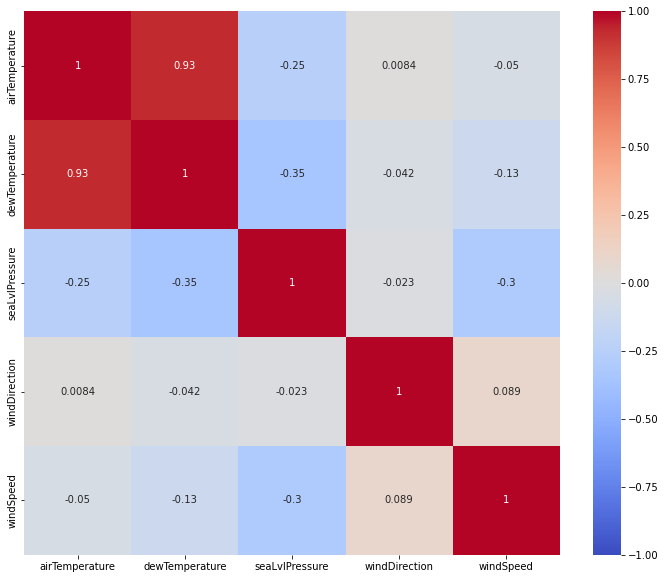

In [21]:
# plot a heatmap
f = plt.figure(1,figsize=(12,10))
sns.heatmap(weather_cor.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

dew temperature and air temperature appear to be highly related.

In [22]:
f.savefig("figures/weatherCorr.png", bbox_inches='tight')
del(weather_cor)

#### 2.3.2 Feature Distribution<a id='2.3.2'></a>

[Text(0.5, 0, 'm/s')]

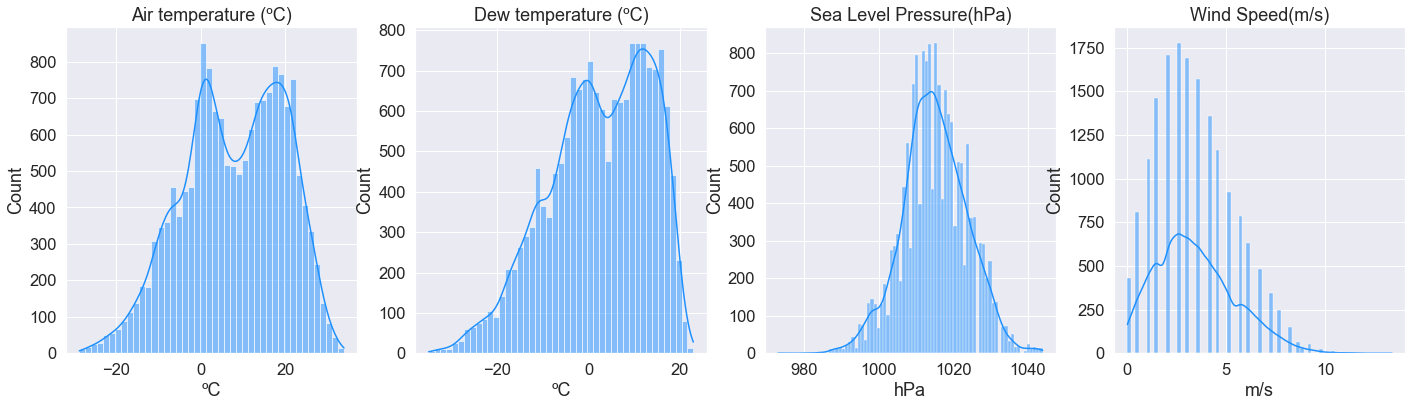

In [23]:
sns.set(rc={'figure.figsize':(24,6)})
sns.set(font_scale = 1.5)
f, axes = plt.subplots(1, 4)
axes = axes.flatten()

color = "dodgerblue"

# air temperature data
ax0 = axes[0]
g0 = sns.histplot(weather_df['airTemperature'].dropna(), ax=ax0, 
                  color=color, kde=True)
ax0.set_title('Air temperature (ºC)')
ax0.set(xlabel="ºC")

# dew temperature data
ax1 = axes[1]
g1 = sns.histplot(weather_df['dewTemperature'].dropna(), ax=ax1, 
                  color=color, kde=True)
ax1.set_title('Dew temperature (ºC)')
ax1.set(xlabel="ºC")

# sea Lvl Pressure data
ax2 = axes[2]
g2 = sns.histplot(weather_df['seaLvlPressure'].dropna(), ax=ax2, 
                  color=color, kde=True)
ax2.set_title('Sea Level Pressure(hPa)')
ax2.set(xlabel="hPa")

# WindSpeed data
ax3 = axes[3]
g3 = sns.histplot(weather_df['windSpeed'].dropna(), ax=ax3, 
                  color=color, kde=True)
ax3.set_title('Wind Speed(m/s)')
ax3.set(xlabel="m/s")

In [24]:
f.savefig("figures/weatherDistribution.png", bbox_inches='tight')

#### 2.3.3 Temporal Analysis - Overall Behaviour by Month <a id='2.3.3'></a>

In [25]:
weather_df.head()

,Unnamed: 0,timestamp,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
17544,17544,2016-01-01 00:00:00,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
17545,17545,2016-01-01 01:00:00,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
17546,17546,2016-01-01 02:00:00,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
17547,17547,2016-01-01 03:00:00,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
17548,17548,2016-01-01 04:00:00,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


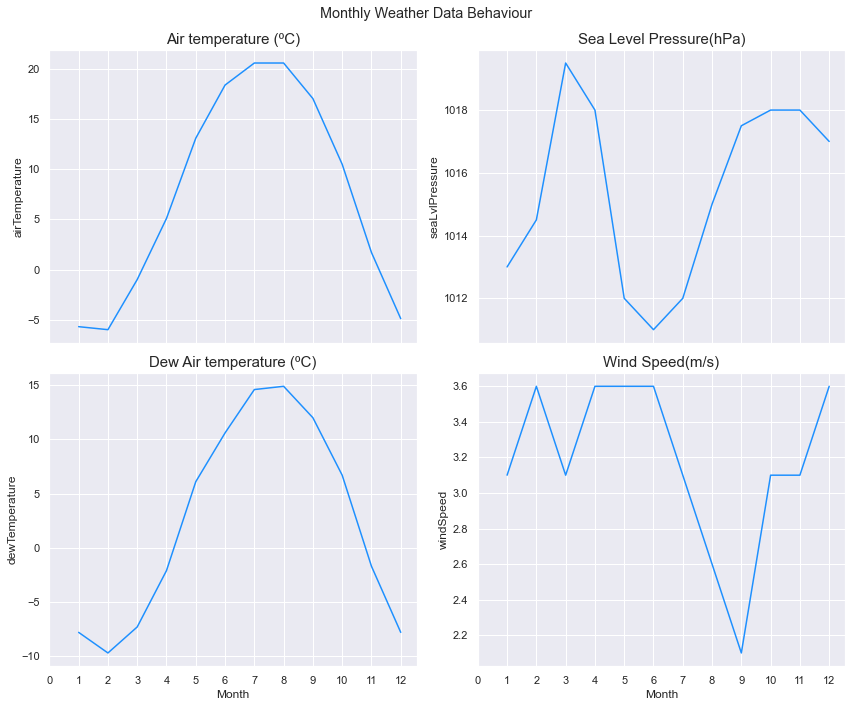

In [26]:
# extract datetime index
times = pd.DatetimeIndex(weather_df.timestamp)

# Find median for each moth
sns.set(rc={"figure.figsize": (12,10)})
f, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()
color = "dodgerblue"

# create a median dataframe with all target features
features = ['airTemperature', 'dewTemperature', 'seaLvlPressure', 'windSpeed']
temp = pd.DataFrame(weather_df.groupby([times.month]).median()[features]).reset_index()


# # air temperature data
ax0 = axes[0]
g0 = sns.lineplot(data=temp, x='timestamp', y='airTemperature',ax=ax0, 
                  color=color)
ax0.set_title('Air temperature (ºC)')

# dew temperature data
ax2 = axes[2]
g2 = sns.lineplot(data=temp, x='timestamp', y='dewTemperature',ax=ax2, 
                  color=color)
ax2.set_title('Dew Air temperature (ºC)')
# sea Lvl Pressure data
ax1 = axes[1]
g1 = sns.lineplot(data=temp, x='timestamp', y='seaLvlPressure',ax=ax1, 
                  color=color)
ax1.set_title('Sea Level Pressure(hPa)')


# WindSpeed data
ax3 = axes[3]
g3 = sns.lineplot(data=temp, x='timestamp', y='windSpeed',ax=ax3, 
                  color=color)
ax3.set_title('Wind Speed(m/s)')

# show all month number.
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Month")  # X label
    ax.set_xticks(range(13))  # X range


# title
plt.suptitle('Monthly Weather Data Behaviour')
f.tight_layout()

In [27]:
f.savefig("figures/MonthlyWeatherDataBehaviour.png", bbox_inches='tight')

#### 2.3.4 Temporal Analysis - Overall Behaviour by Hours <a id='2.3.4'></a>

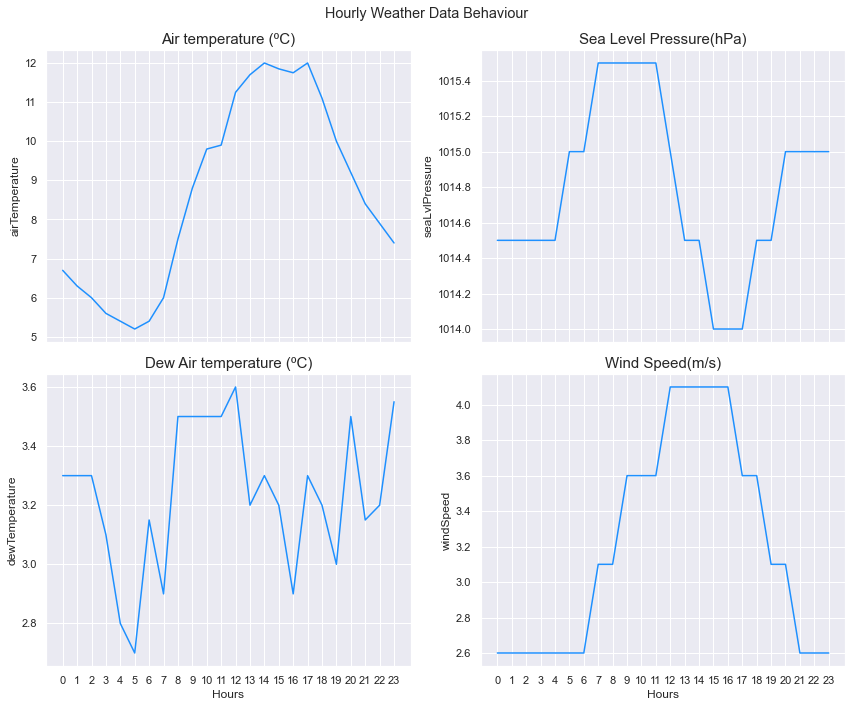

In [28]:
# Find median for each moth
sns.set(rc={"figure.figsize": (12,10)})
f, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()
color = "dodgerblue"

# create a median dataframe with all target features
features = ['airTemperature', 'dewTemperature', 'seaLvlPressure', 'windSpeed']
temp = pd.DataFrame(weather_df.groupby([times.hour]).median()[features]).reset_index()


# air temperature data
ax0 = axes[0]
g0 = sns.lineplot(data=temp, x='timestamp', y='airTemperature',ax=ax0, 
                  color=color)
ax0.set_title('Air temperature (ºC)')

# dew temperature data
ax2 = axes[2]
g2 = sns.lineplot(data=temp, x='timestamp', y='dewTemperature',ax=ax2, 
                  color=color)
ax2.set_title('Dew Air temperature (ºC)')

# sea Lvl Pressure data
ax1 = axes[1]
g1 = sns.lineplot(data=temp, x='timestamp', y='seaLvlPressure',ax=ax1, 
                  color=color)
ax1.set_title('Sea Level Pressure(hPa)')


# WindSpeed data
ax3 = axes[3]
g3 = sns.lineplot(data=temp, x='timestamp', y='windSpeed',ax=ax3, 
                  color=color)
ax3.set_title('Wind Speed(m/s)')

# show all month number.
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Hours")  # X label
    ax.set_xticks(range(24))  # X range


# title
plt.suptitle('Hourly Weather Data Behaviour')
f.tight_layout()

In [29]:
f.savefig("figures/YearlyWeatherDataBehaviour.png", bbox_inches='tight')

#### 2.3.5 Temporal Analysis - Overall Behaviour by Years <a id='2.3.5'></a>

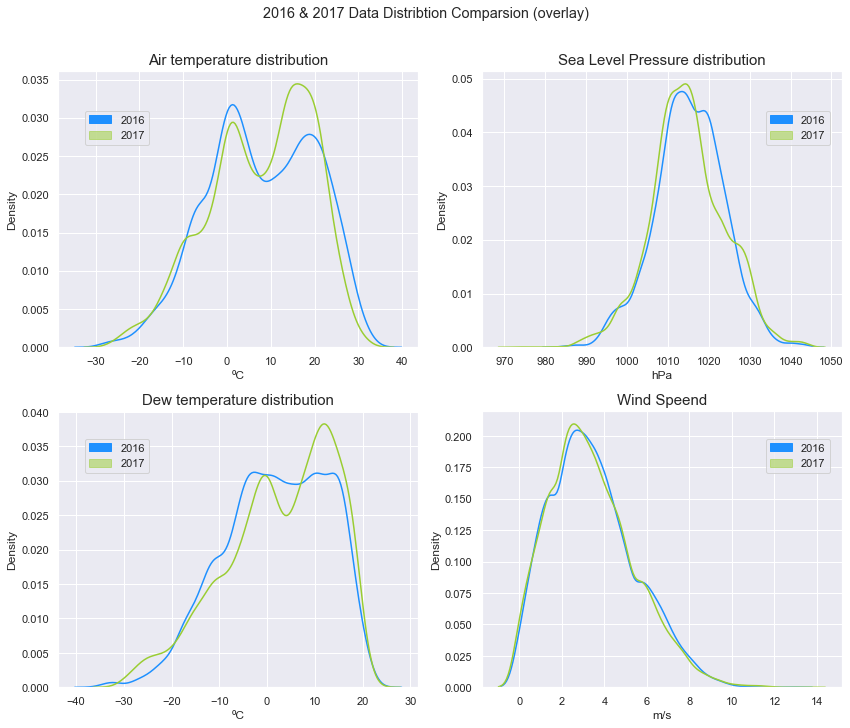

In [30]:
# split data into 2 dataset
cutPoint = '2017-01-01 00:00:00'
weather_2016df = weather_df[weather_df['timestamp'] < cutPoint]
weather_2017df = weather_df[weather_df['timestamp'] >= cutPoint]


sns.set(rc={"figure.figsize": (12,10)})
f, axes = plt.subplots(2, 2)
axes = axes.flatten()
colors = ['dodgerblue', 'yellowgreen']


# air temperature data
ax0 = axes[0]
g0 = sns.kdeplot(weather_2016df["airTemperature"].dropna(), ax=ax0, color = colors[0])
g0b = sns.kdeplot(weather_2017df["airTemperature"].dropna(), ax=ax0, color = colors[1])
ax0.title.set_text('Air temperature distribution')
ax0.set(xlabel="ºC")

# dew temperature data
ax2 = axes[2]
g2 = sns.kdeplot(weather_2016df["dewTemperature"].dropna(), ax=ax2, color = colors[0])
g2b = sns.kdeplot(weather_2017df["dewTemperature"].dropna(), ax=ax2, color = colors[1])
ax2.title.set_text('Dew temperature distribution')
ax2.set(xlabel="ºC")

# sea Lvl Pressure data
ax1 = axes[1]
g1 = sns.kdeplot(weather_2016df["seaLvlPressure"].dropna(), ax=ax1, color = colors[0])
g1b = sns.kdeplot(weather_2017df["seaLvlPressure"].dropna(), ax=ax1, color = colors[1])
ax1.title.set_text('Sea Level Pressure distribution')
ax1.set(xlabel="hPa")


# WindSpeed data
ax3 = axes[3]
g3 = sns.kdeplot(weather_2016df["windSpeed"].dropna(), ax=ax3, color = colors[0])
g3b = sns.kdeplot(weather_2017df["windSpeed"].dropna(), ax=ax3, color = colors[1])
ax3.title.set_text('Wind Speend')
ax3.set(xlabel="m/s")


# Sets fontsize
for ax in axes:
    ax.title.set_size(15)

    
# Customizes legend and title
green_patch = mpatches.Patch(color=colors[0], label='2016')
blue_patch = mpatches.Patch(color=colors[1], label='2017', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.10, 0.80])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.90, 0.80])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.10, 0.35])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.90, 0.35])

f.suptitle("2016 & 2017 Data Distribtion Comparsion (overlay)", x = 0.5, y = 1.01)
f.tight_layout()


In [31]:
f.savefig("figures/weatherdata_year.png", dpi=72, bbox_inches='tight')

#### 2.3.6 Temporal Analysis - Year Comparison by hours<a id='2.3.6'></a>

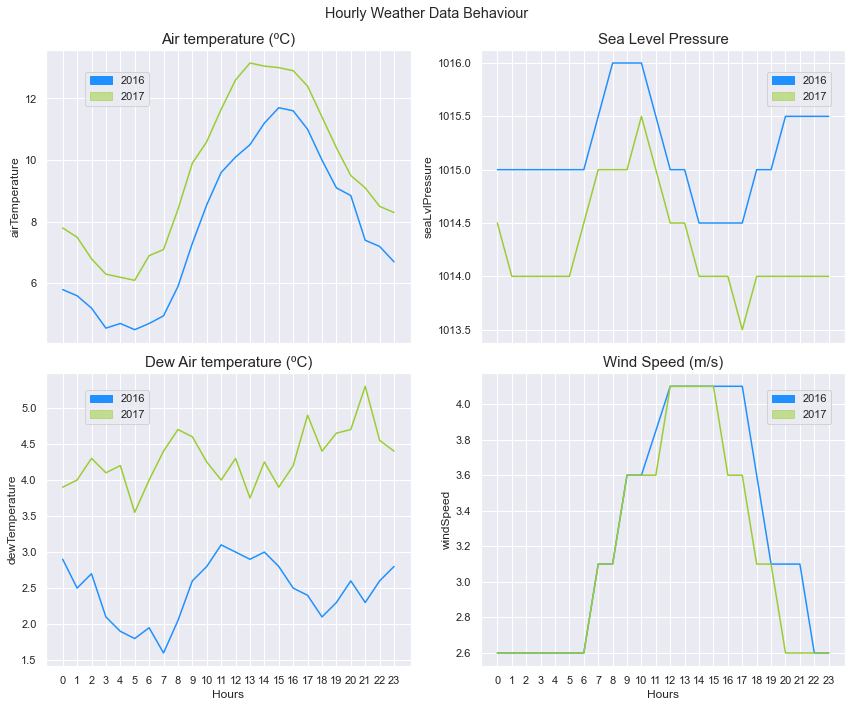

In [32]:
# Find median for each hour
sns.set(rc={"figure.figsize": (12,10)})
f, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()
colors = ['dodgerblue', 'yellowgreen']

times_2016 = pd.DatetimeIndex(weather_2016df.timestamp)
times_2017 = pd.DatetimeIndex(weather_2017df.timestamp)

# create a median dataframe with all target features
features = ['airTemperature', 'dewTemperature', 'seaLvlPressure', 'windSpeed']
temp_2016 = pd.DataFrame(weather_2016df.groupby([times_2016.hour]).median()[features]).reset_index()
temp_2017 =  pd.DataFrame(weather_2017df.groupby([times_2017.hour]).median()[features]).reset_index()

# air temperature data
ax0 = axes[0]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='airTemperature',ax=ax0, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='airTemperature',ax=ax0, 
                  color=colors[1])
ax0.set_title('Air temperature (ºC)')

# dew temperature data
ax2 = axes[2]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='dewTemperature',ax=ax2, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='dewTemperature',ax=ax2, 
                  color=colors[1])
ax2.set_title('Dew Air temperature (ºC)')

# sea Lvl Pressure data
ax3 = axes[1]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='seaLvlPressure',ax=ax3, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='seaLvlPressure',ax=ax3, 
                  color=colors[1])
ax3.set_title('Sea Level Pressure')


# WindSpeed data
ax4 = axes[3]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='windSpeed',ax=ax4, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='windSpeed',ax=ax4, 
                  color=colors[1])
ax4.set_title('Wind Speed (m/s)')


# show all month number.
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Hours")  # X label
    ax.set_xticks(range(24))  # X range

green_patch = mpatches.Patch(color=colors[0], label='2016')
blue_patch = mpatches.Patch(color=colors[1], label='2017', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.10, 0.85])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.90, 0.85])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.10, 0.40])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.90, 0.40])
    
    
# title
plt.suptitle('Hourly Weather Data Behaviour')
f.tight_layout()

In [33]:
f.savefig("figures/weatherdata_year_hour.png", dpi=72, bbox_inches='tight')

#### 2.3.7 Temporal Analysis - Year Comparison by Month<a id='2.3.7'></a>

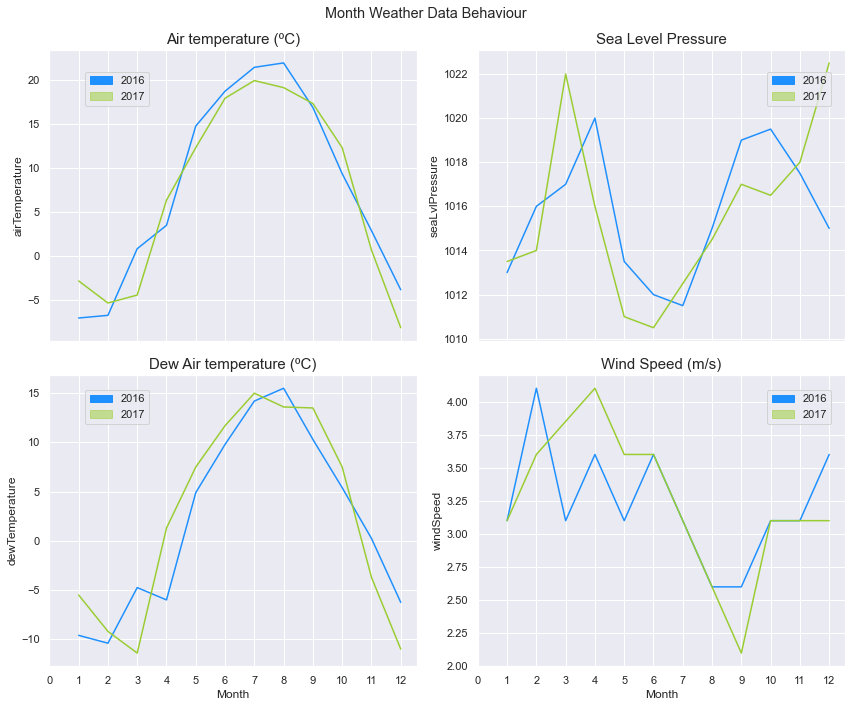

In [34]:
# Find median for each hour
sns.set(rc={"figure.figsize": (12,10)})
f, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()
colors = ['dodgerblue', 'yellowgreen']


# create a median dataframe with all target features
features = ['airTemperature', 'dewTemperature', 'seaLvlPressure', 'windSpeed']
temp_2016 = pd.DataFrame(weather_2016df.groupby([times_2016.month]).median()[features]).reset_index()
temp_2017 =  pd.DataFrame(weather_2017df.groupby([times_2017.month]).median()[features]).reset_index()

# air temperature data
ax0 = axes[0]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='airTemperature',ax=ax0, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='airTemperature',ax=ax0, 
                  color=colors[1])
ax0.set_title('Air temperature (ºC)')

# dew temperature data
ax2 = axes[2]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='dewTemperature',ax=ax2, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='dewTemperature',ax=ax2, 
                  color=colors[1])
ax2.set_title('Dew Air temperature (ºC)')

# sea Lvl Pressure data
ax3 = axes[1]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='seaLvlPressure',ax=ax3, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='seaLvlPressure',ax=ax3, 
                  color=colors[1])
ax3.set_title('Sea Level Pressure')


# WindSpeed data
ax4 = axes[3]
g1 = sns.lineplot(data=temp_2016, x='timestamp', y='windSpeed',ax=ax4, 
                  color=colors[0])
g2 = sns.lineplot(data=temp_2017, x='timestamp', y='windSpeed',ax=ax4, 
                  color=colors[1])
ax4.set_title('Wind Speed (m/s)')


# show all month number.
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Month")  # X label
    ax.set_xticks(range(13))  # X range

green_patch = mpatches.Patch(color=colors[0], label='2016')
blue_patch = mpatches.Patch(color=colors[1], label='2017', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.10, 0.85])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.90, 0.85])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.10, 0.40])
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.90, 0.40])
    
    
# title
plt.suptitle('Month Weather Data Behaviour')
f.tight_layout()

In [35]:
f.savefig("figures/weatherdata_year_month.png", dpi=72, bbox_inches='tight')

### 2.4 Meters Data<a id='2.4'></a>

In [36]:
path = 'data/meters/'
name = 'electricity_cleaned.csv'
elec_df = pd.read_csv(path + name)
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349756 entries, 0 to 349755
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     349756 non-null  int64  
 1   index          349756 non-null  int64  
 2   building_id    349756 non-null  int64  
 3   timestamp      349756 non-null  object 
 4   meter_reading  349756 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 13.3+ MB


In [37]:
times = pd.DatetimeIndex(elec_df.timestamp)

#### 2.4.1 Meters Data Distribution<a id='2.4.1'></a>

Text(0.5, 1.0, 'Air temperature (ºC)')

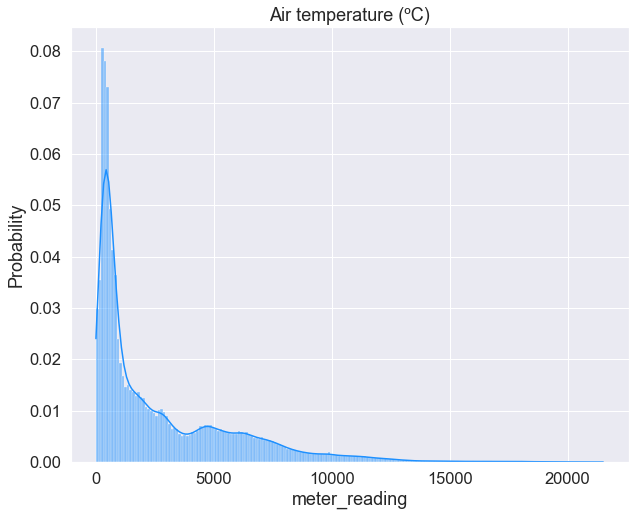

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
f, axes = plt.subplots(1, 1)

color = "dodgerblue"

# air temperature data
ax0 = axes
g0 = sns.histplot(elec_df["meter_reading"].dropna(), ax=ax0, 
                  color=color, kde=True, stat = "probability")
ax0.set_title('Air temperature (ºC)')


The distribution of the meter data is highly skewed.. There are loits of zeros which can also have meanings.

In [39]:
elec_df.describe()

,Unnamed: 0,index,building_id,meter_reading
count,349756.000000,349756.000000,349756.000000,349756.000000
mean,174877.500000,87438.796447,854.353532,2703.920601
std,100966.004713,50483.515814,101.303191,3053.034635
min,0.000000,0.000000,789.000000,0.000000
25%,87438.750000,43719.000000,794.000000,474.719200
50%,174877.500000,87438.500000,799.000000,1321.260000
75%,262316.250000,131158.000000,803.000000,4334.042500
max,349755.000000,175199.000000,1032.000000,21507.570000


In [40]:
elec_df['timestamp']= pd.to_datetime(elec_df['timestamp'])

#### 2.4.2 Meters Data Behavior by month<a id='2.4.2'></a>

Text(0.5, 0.98, 'Meter reading by Month')

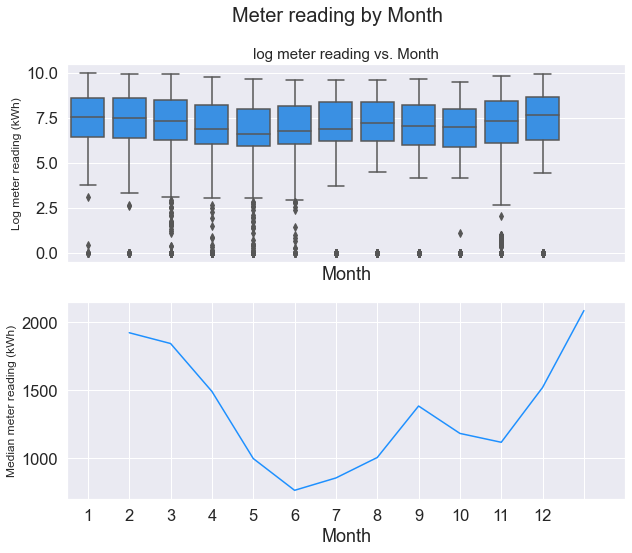

In [41]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
f, axes = plt.subplots(2, 1, sharex=True)
axes = axes.flatten()

color = "dodgerblue"

# Creates a temporal dataframe
temp = pd.DataFrame({"Month":elec_df.timestamp.dt.month, "meter_reading": np.log(elec_df.meter_reading+1)})
# boxplot
ax2 = axes[0]
sns.boxplot(data=temp, x="Month", y="meter_reading", ax=ax2, color=color)
ax2.set_ylabel("Log meter reading (kWh)", fontsize=12)
ax2.set_title('log meter reading vs. Month', fontdict={'size':16})


#Second Plot
temp = pd.DataFrame(elec_df.groupby([times.month]).median()["meter_reading"]).reset_index()
ax1 = axes[1]
sns.lineplot(data=temp, x="timestamp", y="meter_reading", ax = ax1, color=color)
ax1.set_ylabel("Median meter reading (kWh)", fontsize=12)

for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Month")  # X label
    ax.set_xticks(range(14))  # X range


f.suptitle('Meter reading by Month', fontsize=20)

In [42]:
f.savefig("figures/MonthlyMeterReading.png", dpi=72, bbox_inches='tight')

#### 2.4.3 Meters Data Behavior by Hour<a id='2.4.3'></a>

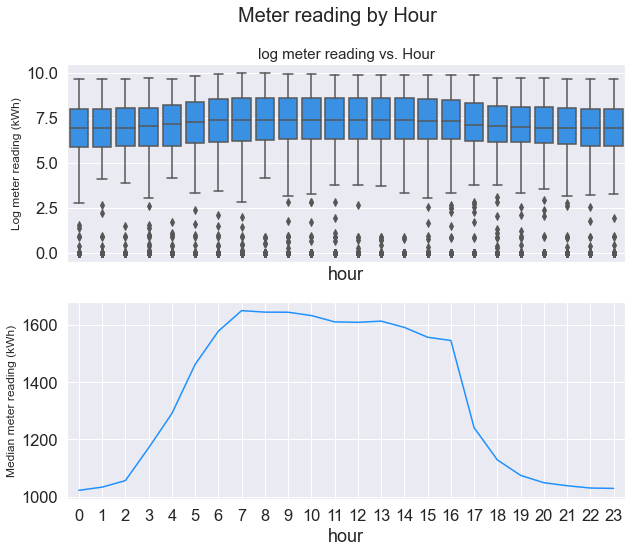

In [43]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
f, axes = plt.subplots(2, 1, sharex=True)
axes = axes.flatten()

color = "dodgerblue"

# Creates a temporal dataframe
temp = pd.DataFrame({"hour":elec_df.timestamp.dt.hour, "meter_reading": np.log(elec_df.meter_reading+1)})
# boxplot
ax2 = axes[0]
sns.boxplot(data=temp, x="hour", y="meter_reading", ax=ax2, color=color)
ax2.set_ylabel("Log meter reading (kWh)", fontsize=12)
ax2.set_title('log meter reading vs. Hour', fontdict={'size':16})


#Second Plot
temp = pd.DataFrame(elec_df.groupby([times.hour]).median()["meter_reading"]).reset_index()
ax1 = axes[1]
sns.lineplot(data=temp, x="timestamp", y="meter_reading", ax = ax1, color=color)
ax1.set_ylabel("Median meter reading (kWh)", fontsize=12)
f.suptitle('Meter reading by Hour', fontsize=20)

for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="hour")  # X label
    ax.set_xticks(range(24))  # X range



In [44]:
f.savefig("figures/HourlyMeterReading.png", dpi=72, bbox_inches='tight')

#### 2.4.4 Meters Data Behavior by Week<a id='2.4.4'></a>

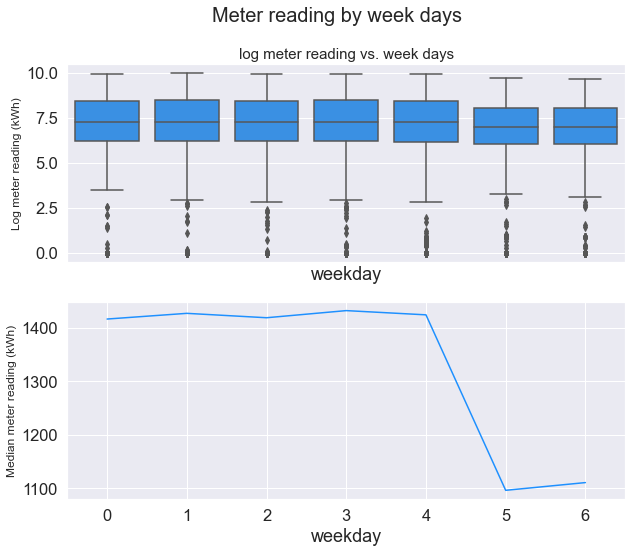

In [45]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
f, axes = plt.subplots(2, 1, sharex=True)
axes = axes.flatten()

color = "dodgerblue"

# Creates a temporal dataframe
temp = pd.DataFrame({"weekday":elec_df.timestamp.dt.weekday, "meter_reading": np.log(elec_df.meter_reading+1)})
# boxplot
ax2 = axes[0]
sns.boxplot(data=temp, x="weekday", y="meter_reading", ax=ax2, color=color)
ax2.set_ylabel("Log meter reading (kWh)", fontsize=12)
ax2.set_title('log meter reading vs. week days', fontdict={'size':16})


#Second Plot
temp = pd.DataFrame(elec_df.groupby([times.weekday]).median()["meter_reading"]).reset_index()
ax1 = axes[1]
sns.lineplot(data=temp, x="timestamp", y="meter_reading", ax = ax1, color=color)
ax1.set_ylabel("Median meter reading (kWh)", fontsize=12)
f.suptitle('Meter reading by week days', fontsize=20)

for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="weekday")  # X label
    ax.set_xticks(range(0,7))  # X range

In [46]:
f.savefig("figures/WeeklyReading.png", dpi=72, bbox_inches='tight')

### 3.0 Combine All Data<a id='3.0'></a>

In [47]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20 non-null     float64
 1   loc_id    20 non-null     float64
 2   subUsage  20 non-null     object 
 3   sqm       20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.3+ KB


In [48]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 17544 to 35087
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17544 non-null  int64  
 1   timestamp       17544 non-null  object 
 2   site_id         17544 non-null  object 
 3   airTemperature  16860 non-null  float64
 4   dewTemperature  16814 non-null  float64
 5   seaLvlPressure  16826 non-null  float64
 6   windDirection   16860 non-null  float64
 7   windSpeed       16860 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


In [49]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349756 entries, 0 to 349755
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     349756 non-null  int64         
 1   index          349756 non-null  int64         
 2   building_id    349756 non-null  int64         
 3   timestamp      349756 non-null  datetime64[ns]
 4   meter_reading  349756 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 13.3 MB


In [50]:
building_data = building_data.rename(columns= {'id': 'building_id'})
building_data.building_id = building_data.building_id.astype('int64')
weather_df['timestamp']= pd.to_datetime(weather_df['timestamp'])

In [51]:
#merge meter info and building data
df = pd.merge(building_data, elec_df, on= "building_id", how="right")

In [52]:
df.head()

,building_id,loc_id,subUsage,sqm,Unnamed: 0,index,timestamp,meter_reading
0,789,7.0,College Classroom,6000.0,0,0,2016-01-01 00:00:00,516.43
1,789,7.0,College Classroom,6000.0,1,1,2016-01-01 01:00:00,519.40
2,789,7.0,College Classroom,6000.0,2,2,2016-01-01 02:00:00,501.68
3,789,7.0,College Classroom,6000.0,3,3,2016-01-01 03:00:00,507.87
4,789,7.0,College Classroom,6000.0,4,4,2016-01-01 04:00:00,509.45


In [53]:
#merge df with weather
df = pd.merge(df, weather_df, on= "timestamp",  how="left")

In [54]:
df.head()

,building_id,loc_id,subUsage,sqm,Unnamed: 0_x,index,timestamp,meter_reading,Unnamed: 0_y,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
0,789,7.0,College Classroom,6000.0,0,0,2016-01-01 00:00:00,516.43,17544,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
1,789,7.0,College Classroom,6000.0,1,1,2016-01-01 01:00:00,519.40,17545,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
2,789,7.0,College Classroom,6000.0,2,2,2016-01-01 02:00:00,501.68,17546,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
3,789,7.0,College Classroom,6000.0,3,3,2016-01-01 03:00:00,507.87,17547,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
4,789,7.0,College Classroom,6000.0,4,4,2016-01-01 04:00:00,509.45,17548,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


In [55]:
columns = ['Unnamed: 0_x', 'index', 'Unnamed: 0_y', 'loc_id', 'building_id']
df_temp = df.drop(columns=columns)

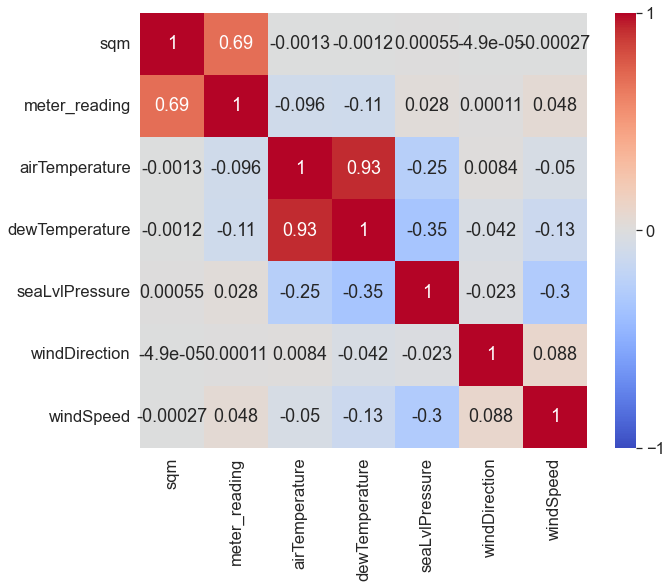

In [56]:
sns.heatmap(df_temp.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)
sns.set(font_scale=5)

### 4.0 Save Data<a id='4.0'></a>

In [57]:
path = 'data/'
file = "mlmodeldata.csv"
df.to_csv(path+file)